*- **Word embedding is a technique used in natural language processing (NLP) that represents words as numbers so that a computer can work with them.** It is a popular approach for learned numeric representations of text.*

- reference (https://medium.com/@986110101/word-embedding-2e969566fe11)

In [1]:
from optialgo import text_clean, f_word_tokenize
from nltk.util import skipgrams
import numpy as np

In [2]:
with open("dataset/corpus/uud1945.txt", "r", encoding="utf-8") as f:
    corpus = "".join(ch for ch in f.read()).lower()

texts = text_clean(corpus.splitlines())
texts

['bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab itu  maka penjajahan di atas dunia harus dihapuskan  karena tidak sesuai dengan perikemanusiaan dan perikeadilan ',
 'dan perjuangan pergerakan kemerdekaan indonesia telah sampailah kepada saat yang berbahagia dengan selamat sentausa mengantarkan rakyat indonesia ke depan pintu gerbang kemerdekaan negara indonesia  yang merdeka  bersatu  berdaulat  adil dan makmur ',
 'atas berkat rakhmat allah yang maha kuasa dan dengan didorongkan oleh keinginan luhur  supaya berkehidupan kebangsaan yang bebas  maka rakyat indonesia menyatakan dengan ini kemerdekaannya ',
 'kemudian daripada itu untuk membentuk suatu pemerintah negara indonesia yang melindungi segenap bangsa indonesia dan seluruh tumpah darah indonesia dan untuk memajukan kesejahteraan umum  mencerdaskan kehidupan bangsa  dan ikut melaksanakan ketertiban dunia yang berdasarkan kemerdekaan  perdamaian abadi dan keadilan sosial  maka disusunlah kemerdekaan keba

In [3]:
token = "".join(texts)
token = f_word_tokenize(token)
vocab = set(token)
print(f"token : {token}")
print(f"vocab : {vocab}")

token : ('bahwa', 'sesungguhnya', 'kemerdekaan', 'itu', 'ialah', 'hak', 'segala', 'bangsa', 'dan', 'oleh', 'sebab', 'itu', 'maka', 'penjajahan', 'di', 'atas', 'dunia', 'harus', 'dihapuskan', 'karena', 'tidak', 'sesuai', 'dengan', 'perikemanusiaan', 'dan', 'perikeadilan', 'dan', 'perjuangan', 'pergerakan', 'kemerdekaan', 'indonesia', 'telah', 'sampailah', 'kepada', 'saat', 'yang', 'berbahagia', 'dengan', 'selamat', 'sentausa', 'mengantarkan', 'rakyat', 'indonesia', 'ke', 'depan', 'pintu', 'gerbang', 'kemerdekaan', 'negara', 'indonesia', 'yang', 'merdeka', 'bersatu', 'berdaulat', 'adil', 'dan', 'makmur', 'atas', 'berkat', 'rakhmat', 'allah', 'yang', 'maha', 'kuasa', 'dan', 'dengan', 'didorongkan', 'oleh', 'keinginan', 'luhur', 'supaya', 'berkehidupan', 'kebangsaan', 'yang', 'bebas', 'maka', 'rakyat', 'indonesia', 'menyatakan', 'dengan', 'ini', 'kemerdekaannya', 'kemudian', 'daripada', 'itu', 'untuk', 'membentuk', 'suatu', 'pemerintah', 'negara', 'indonesia', 'yang', 'melindungi', 'segena

In [4]:
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

encode = lambda x: [word2idx[word] for word in x]
decode = lambda x: [idx2word[idx] for idx in x]

sample = token[:5]
print("word2idx : ", encode(sample))
print("idx2word : ", decode(encode(sample)))

word2idx :  [63, 96, 97, 22, 24]
idx2word :  ['bahwa', 'sesungguhnya', 'kemerdekaan', 'itu', 'ialah']


In [5]:
index_token = encode(token)

### Generate pair label (skipgrams)

In [6]:
def generate_pair_label(texts, window_size, seed=42):
    np.random.seed(seed=seed)
    positive = list(skipgrams(sequence=texts, n=2, k=window_size))
    cp1 = [word[0] for word in positive]
    cp2 = [word[-1] for word in positive]

    negative = []
    s = 1

    while s <= len(positive):
        idx1 = np.random.choice(range(len(positive)))
        idx2 = np.random.choice(range(len(positive)))
        test = (cp1[idx1], cp2[idx2])
        if test not in positive:
            s += 1
            negative.append(test)

    lab_pos = [[1]] * len(positive)
    lab_neg = [[0]] * len(negative)
    positive = np.append(positive, lab_pos, axis=1)
    negative = np.append(negative, lab_neg, axis=1)
    result = np.append(positive, negative, axis=0)
    np.random.shuffle(result)
    pair = result[:, :-1]
    label = result[:, -1]
    return pair, label


pair, label = generate_pair_label(index_token, 1)
print("pair : ", pair)
print("label : ", label)

pair :  [[101  38]
 [ 93  80]
 [ 58  51]
 ...
 [ 22  97]
 [ 33  94]
 [ 97  16]]
label :  [1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0
 1 0 1 1 0 

### Preview

In [7]:
# positive : word in context (window_size) | negative : word out of context (window_size)
for p, l in zip(pair, label):
    text = decode(p)
    l = "positive" if l == 1 else "negative"
    print(f"{text} -> {l}")

['perikeadilan', 'perjuangan'] -> positive
['kemerdekaannya', 'kemudian'] -> positive
['melindungi', 'segenap'] -> positive
['ini', 'persatuan'] -> negative
['ini', 'rakhmat'] -> negative
['disusunlah', 'dipimpin'] -> negative
['daripada', 'itu'] -> positive
['segenap', 'sesuai'] -> negative
['pergerakan', 'yang'] -> negative
['saat', 'negara'] -> negative
['keinginan', 'dan'] -> negative
['supaya', 'kebangsaan'] -> positive
['yang', 'maha'] -> positive
['itu', 'membentuk'] -> positive
['mewujudkan', 'dengan'] -> negative
['berkat', 'undang'] -> negative
['mengantarkan', 'dan'] -> negative
['hikmat', 'bebas'] -> negative
['disusunlah', 'kebangsaan'] -> positive
['bangsa', 'dan'] -> positive
['menyatakan', 'tidak'] -> negative
['dalam', 'permusyawaratan'] -> positive
['kemerdekaan', 'yang'] -> negative
['maka', 'disusunlah'] -> positive
['indonesia', 'bagi'] -> negative
['maha', 'keinginan'] -> negative
['yang', 'yang'] -> negative
['harus', 'kesejahteraan'] -> negative
['sebab', 'itu']

In [8]:
import torch
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
X = torch.LongTensor(pair)
y = torch.FloatTensor(label).unsqueeze(1)

dataset = TensorDataset(X, y)

TEST_SIZE: float = 0.2
train_size = int((1 - TEST_SIZE) * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(
    dataset, lengths=[train_size, val_size]
)

dataloaders = {
    "train": DataLoader(train_dataset, batch_size=16),
    "val": DataLoader(val_dataset, batch_size=16),
}

In [10]:
class WordEmbedding(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size, input_size):
        super(WordEmbedding, self).__init__()
        self.embedding = torch.nn.Embedding(
            num_embeddings=vocab_size, embedding_dim=embed_dim
        )
        self.flatten = torch.nn.Flatten()
        self.fc = torch.nn.Linear(input_size * embed_dim, hidden_size)
        self.out = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = F.relu(x)
        x = self.out(x)
        x = F.sigmoid(x)
        return x


VOCAB_SIZE = len(word2idx) + 1
HIDDEN_SIZE = 64
EMBED_DIM = 50
INPUT_SIZE = 2

In [11]:
model = WordEmbedding(
    vocab_size=VOCAB_SIZE,
    embed_dim=EMBED_DIM,
    hidden_size=HIDDEN_SIZE,
    input_size=INPUT_SIZE,
)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(params=model.parameters())


def train(
    EPOCHS,
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    dataloaders=dataloaders,
):
    train_acc, train_loss = [], []
    val_acc, val_loss = [], []
    for epoch in range(EPOCHS):
        for phase in dataloaders:
            if phase == "train":
                model.train()
            else:
                model.eval()

            cost = 0.0
            acc = 0.0

            for inputs, targets in dataloaders[phase]:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                pred = (outputs >= 0.5).float()

                if phase == "train":
                    loss.backward()
                    optimizer.step()

                cost += loss.item() * inputs.shape[0]
                acc += torch.sum(pred.squeeze() == targets.squeeze()) / inputs.shape[0]

            if phase == "train":
                train_acc.append(acc / len(train_dataset))
                train_loss.append(cost / len(train_dataset))
            else:
                val_acc.append(acc / len(val_dataset))
                val_loss.append(cost / len(val_dataset))

        print(
            f"\rEpoch : {epoch + 1:4}/{EPOCHS:4} | train_loss : {train_loss[-1]:.4f} | val_loss : {val_loss[-1]:.4f} | train_acc : {train_acc[-1]:.4f} | val_acc : {val_acc[-1]:.4f}",
            end=" ",
        )


train(100)

Epoch :  100/ 100 | train_loss : 0.5303 | val_loss : 0.7725 | train_acc : 0.0589 | val_acc : 0.0267 

### Preview WordVect

In [12]:
for word in word2idx:
    print(f"word : {word}")
    x = torch.tensor(encode([word]))
    print(f"vector : {model.embedding(x)}")

word : hikmat
vector : tensor([[-2.0608, -0.6350, -0.0497, -0.2814,  0.7711,  0.0384, -0.3225,  0.6231,
         -0.9664, -1.8208, -0.7331, -0.2397, -0.3488,  0.9686, -0.6891, -0.4797,
         -2.4371,  0.7429, -0.9802,  0.0055, -1.1565,  0.4954,  0.6724, -0.8040,
          2.2625,  0.7378, -0.5355,  1.9755, -1.0816,  0.1259, -0.2451,  0.3873,
          1.0020,  2.2273, -0.3609, -0.0493, -0.3317, -1.9290,  0.1934, -0.3007,
          2.2444,  1.3810,  0.2089, -1.4230,  0.5680, -0.2303,  1.6379,  1.5683,
          1.8671,  0.1455]], grad_fn=<EmbeddingBackward0>)
word : bersatu
vector : tensor([[ 2.3745e-02,  1.6397e+00,  1.0420e+00,  6.0474e-01, -1.1684e-01,
          2.3421e-01,  3.1723e-01,  2.7632e-01,  3.8100e-01, -9.3495e-01,
          8.6974e-04, -1.1224e+00, -5.7655e-01,  3.0932e-01, -4.2696e-01,
         -1.7460e-01, -3.5398e-01, -1.5303e+00, -1.1719e-01,  2.9100e-01,
         -1.2182e+00,  8.0012e-01,  8.2945e-01,  3.1891e-01,  1.5390e+00,
          3.0177e-01, -5.9965e-01,  9.

## Visualisasi vektor embedding dalam grafik

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [14]:
embeddings = model.embedding.weight.data.numpy()
print("Jumlah sampel dalam embeddings:", embeddings.shape[0])

Jumlah sampel dalam embeddings: 110


In [15]:
tsne = TSNE(n_components=2, random_state=123, perplexity=10)
embeddings_2d = tsne.fit_transform(embeddings)

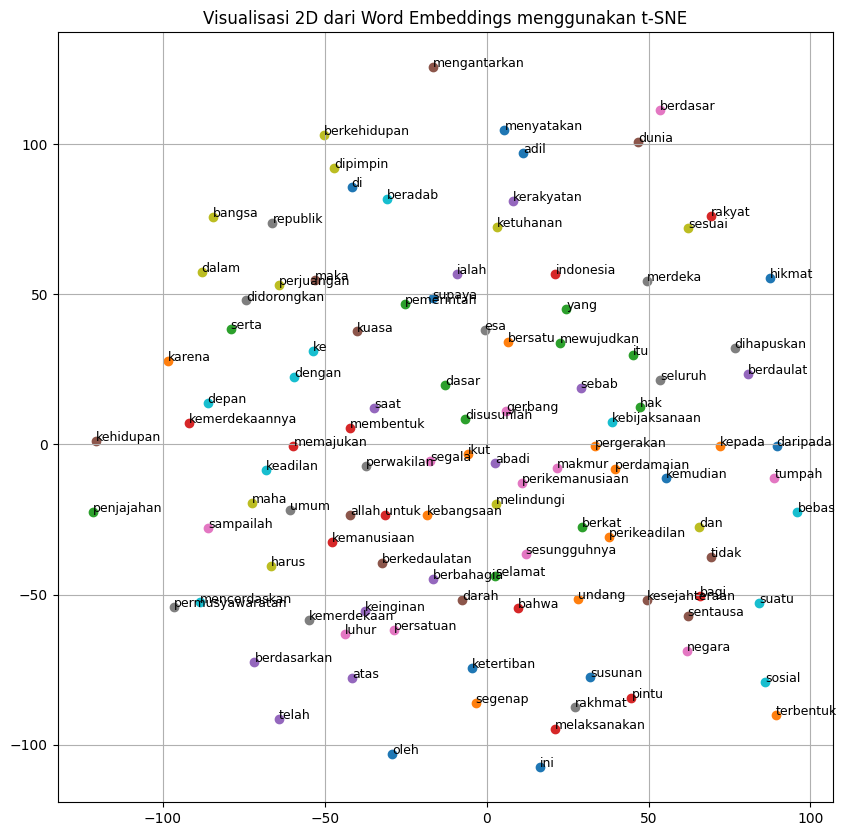

In [16]:
words = sorted(word2idx.items(), key=lambda x: x[1])

plt.figure(figsize=(10, 10))
for word, idx in words:
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1])
    plt.annotate(word, (embeddings_2d[idx, 0], embeddings_2d[idx, 1]), fontsize=9)
plt.grid(True)
plt.title("Visualisasi 2D dari Word Embeddings menggunakan t-SNE")
plt.show()